In [81]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split

# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
train = pd.read_csv('train_t.csv')
test = pd.read_csv('test_t.csv')

In [24]:
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

In [25]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [26]:
train_median=train['Age'].median()
test_age_median=test['Age'].median()
test_fare_median=test['Fare'].median()

In [27]:
from collections import Counter
Counter((train['Embarked'])).most_common()[0]

('S', 644)

In [28]:
# for column
train['Age'] = train['Age'].replace(np.nan, train_median)
train['Embarked'] = train['Embarked'].replace(np.nan, 'S')
test['Age'] = test['Age'].replace(np.nan, test_age_median)
test['Fare'] = test['Fare'].replace(np.nan, test_fare_median)

# for whole dataframe
#df = df.replace(np.nan, 0)

# inplace
#df.replace(np.nan, 0, inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [31]:
train = train.replace(to_replace=['male', 'female'], value=[0, 1])
test = test.replace(to_replace=['male', 'female'], value=[0, 1])

In [32]:
train = train.replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2])
test = test.replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2])

In [33]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0


In [34]:
x_train = train.drop(['Cabin','Ticket','Name','Survived'], axis = 1)
y_train = train['Survived']
x_test = test.drop(['Cabin','Ticket','Name'], axis = 1)

In [35]:
print(x_train)

             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         0
2                 1    1  38.0      1      0  71.2833         1
3                 3    1  26.0      0      0   7.9250         0
4                 1    1  35.0      1      0  53.1000         0
5                 3    0  35.0      0      0   8.0500         0
...             ...  ...   ...    ...    ...      ...       ...
887               2    0  27.0      0      0  13.0000         0
888               1    1  19.0      0      0  30.0000         0
889               3    1  28.0      1      2  23.4500         0
890               1    0  26.0      0      0  30.0000         1
891               3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [36]:
print(x_test)

             Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
PassengerId                                                     
892               3    0  34.5      0      0    7.8292         2
893               3    1  47.0      1      0    7.0000         0
894               2    0  62.0      0      0    9.6875         2
895               3    0  27.0      0      0    8.6625         0
896               3    1  22.0      1      1   12.2875         0
...             ...  ...   ...    ...    ...       ...       ...
1305              3    0  27.0      0      0    8.0500         0
1306              1    1  39.0      0      0  108.9000         1
1307              3    0  38.5      0      0    7.2500         0
1308              3    0  27.0      0      0    8.0500         0
1309              3    0  27.0      1      1   22.3583         1

[418 rows x 7 columns]


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
parametrs = { 'max_depth': range (1,20, 2),
              'min_samples_leaf': range (1,11),
              'min_samples_split': range (2,11,2) }

In [39]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11, 2)})

In [59]:
clf.fit(x_train, y_train)
#y_pred = grid.predict(x_train)
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print (acc_decision_tree)

97.98


In [51]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [52]:
acc_decision_tree

97.98

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_train, y_pred)

0.9797979797979798

In [55]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.020202020202020204
Mean Squared Error: 0.020202020202020204
Root Mean Squared Error: 0.1421338109037403


[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

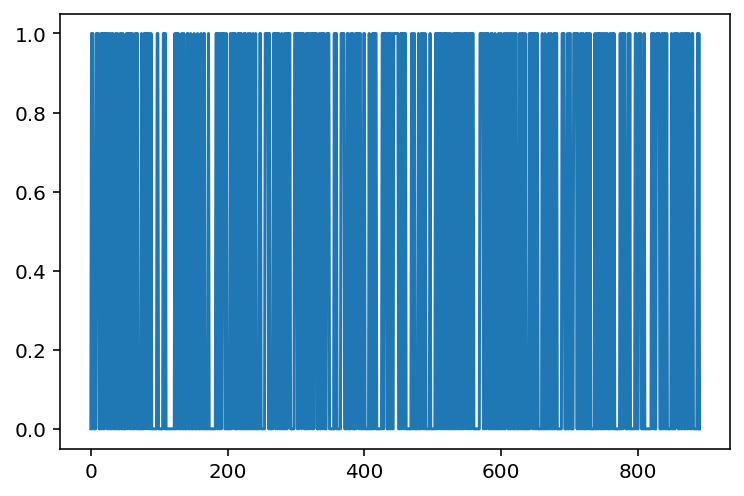

In [56]:
y_train = np.array(y_train)
print(y_train)
print(y_pred)
plt.plot(y_train)

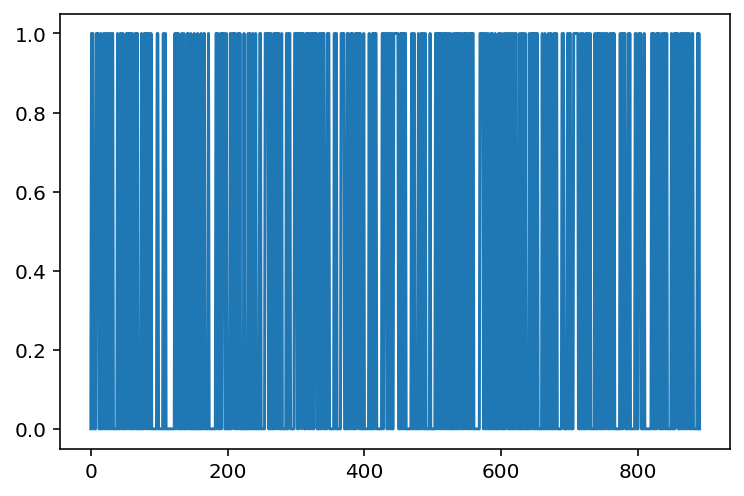

In [57]:
plt.plot(y_pred)


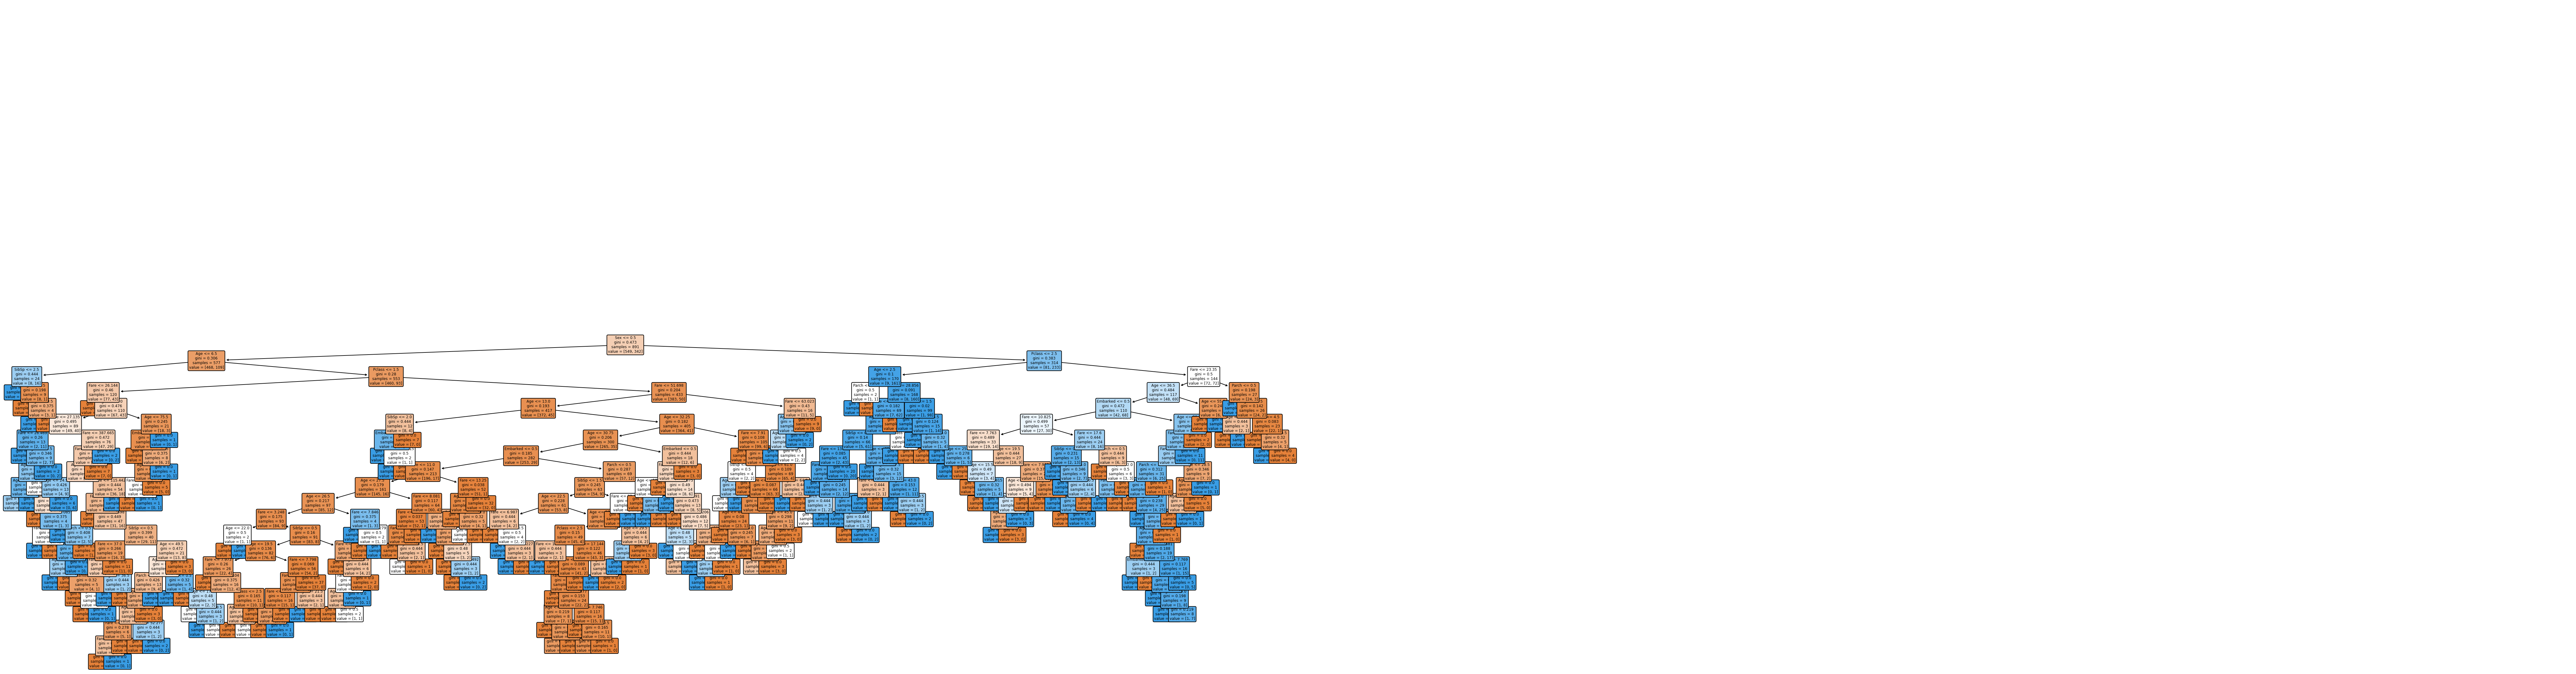

In [58]:
from sklearn import tree
plt.figure(figsize=(75,20))  
_ = tree.plot_tree(clf, feature_names = x_train.columns, 
             filled=True, fontsize=6, rounded = True)
plt.savefig('filename.png')
plt.show()